# Проект по компьютерным играм #

**Описание проекта:**

Мы работаем в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

## Подготовка данных

### Откроем файл, выведем первые 10 строк на экран и посмотрим общую информацию о датасете

* Импортируем необходимые библиотеки для дальнейшей работы 

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
 

* Откроем файл

In [2]:
data = pd.read_csv('/datasets/games.csv')
display (data.head(10))
data.info()  

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Приведем названия столбцов к нижнему регистру

In [3]:
data.columns = data.columns.str.lower()

### Проверим датасет на наличие явных дубликатов. Удалим их в случае наличия.

In [4]:
display (data.duplicated().sum()) # Явных дубликатов нет

0

### Работа с пропусками

* Выведем общее количество пропусков для каждого столбца

In [5]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

* Обработаем значения в столбцах. 

Выведем на экран уникальные значения. Заменим пропуски и аномальные значения, где возможно.
Пропуски в данных возникают "механически", когда данные просто забывают внести в таблицу или же в следствии того,что данные нельзя точно определить (не утверждено официальное название, неясен год релиза, не успели получить оценки пользователей/экспертов, так как игра только вышла, трудно отнести игру к конкретной категории)

In [6]:
#Пропусков в столбце с названиями всего 2. Возможно, названия просто забыли завести в таблицу или названия не были ещё утверждены официально.
#Заполнить их нечем, удалим из датасета,так как потери совсем незначительны
data['name'].unique()
data.dropna(subset =['name'],inplace = True)

In [7]:
data['platform'].unique()
#  все данные в норме

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [8]:
data['genre'].unique()
# 2 нулевых значения удалим, так как процент пропусков крайне низок,а определить жанр трудно
data.dropna(subset =['genre'],inplace = True)

In [9]:
data['year_of_release'].unique()
#Определить дату выхода релиза исходя из имеющихся данных возможности нет. Оставляем пустые значения

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [10]:
data['critic_score'].unique()
# Пустых значений довольно много.Но, видимо, придётся с этим смириться, так как выставленные оценки за других  людей не будут правдоподобны и объективны

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
# В данных встречается значени "tbd". Значит, оценка ещё не определена. 
# Функция для замены значения 'tbd' на -1 (сделаем заглушку)
def replace_wrong_user_scores(wrong_user_scores, correct_user_score):
    data['user_score'] = data['user_score'].replace(wrong_user_scores, correct_user_score)
replace_wrong_user_scores('tbd', '-1')
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '-1', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [13]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [14]:
#Рейтинг 'K-A' - старый. Он несёт примерно тот же смысл, что и рейтинг E. Заменим его на более свежий. Пустые значения нам опять же нечем заменить
def replace_rating(old_rating, new_rating):
    data['rating'] = data['rating'].replace(old_rating, new_rating)
replace_rating('K-A', 'E')
   
#Вместо пустных значений поставим "заглушку":
data['rating'] =  data['rating'].fillna(value = '-1')
display(data['rating'].unique())

array(['E', '-1', 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

* Посмотрим, сколько пропусков у нас осталось

In [15]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

К сожалению, оставшиеся пропуски заполнить нам не чем. Оставим, как есть

### Изменение типа данных

* Заменим тип данных в столбцах 'year_of_release' и  'user_score' на числовой float64.

In [16]:

data['user_score'] = data['user_score'].astype('float64', errors = 'ignore')
data['year_of_release'] = data['year_of_release'].astype('float64',errors = 'ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


* Посчитаем сколько было продаж во всех регионах и добавим новый столбец 'total_sales' в датасет

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

display (data.head(20))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,-1,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,-1,28.31


In [18]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,' : кол-во 0', temp[temp[col_l] == 0][col_l].count(),
        ', процент 0', round(temp[temp[col_l] == 0][col_l].count()/len(temp)*100, 2),'%')
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio: Instant Artist' 'wwe Smackdown vs. Raw 2006'
 '¡Shin Chan Flipa en colores!

**В данном разделе мы подготовили данные для дальнейшего анализа:проверили наличие дубликатов, устранили аномальные значения, изменилитип данных, где это было необходимо, поставили заглушки, удалили неинформативные строки, добавили необходимую информацию. Теперь можно переходить к исследовательскому анализу.**

## Исследовательский анализ данных

### Определение актуального периода для дальнейшего анализа

#### Определим, сколько игр выпускалось в разные годы

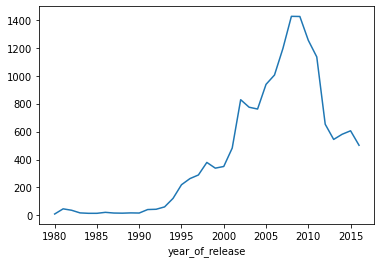

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

In [19]:
data_sum_for_year =data.groupby('year_of_release')['name'].count()
data_sum_for_year.plot()
plt.xlable('Год выпуска')
plt.ylable('Количество игр'')
plt.show()
display(data_sum_for_year)

Видим, что до 1994 игр выпускалось крайне мало. Далее количесвто их увеличиволось и достигло пика в 2006-2011годах. в 2012 количесво выпущенных игр резко упало, практически в 2 раза по сравнению с 2011. в 2013 ещё немного снизилось и начало незначительно увеличиваться. Так как нам нужно сделать прогноз на 2017 год, считаю актуально данные брать за предыдущие 2-3 года. 

**Так как данные за 2016 год могут быть неполными,возьмём для исследования данные за 2014 - 2016 года.**

#### Оставим в исходных данных информацию только за интересующий нас период

In [20]:
data_new = data.query("2014 <= year_of_release <= 2016").reset_index(drop= True)
#Посмотрим, сколько осталось строк
display (len(data_new))
display (data_new.head(10))

1689

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,-1,14.63
1,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,-1,11.68
3,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,-1,7.98
5,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
6,FIFA 17,PS4,2016.0,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
7,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,-1,7.55
8,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,-1,7.39
9,Fallout 4,PS4,2015.0,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17


### Посмотрим, как менялись продажи по платформам.

#### Определим как менялись продажи по платформам за все года

**Нужно ли это делать или распределение но годам нужно только для топ-10 платформ? Что будет ниже...**

<function matplotlib.pyplot.show(close=None, block=None)>

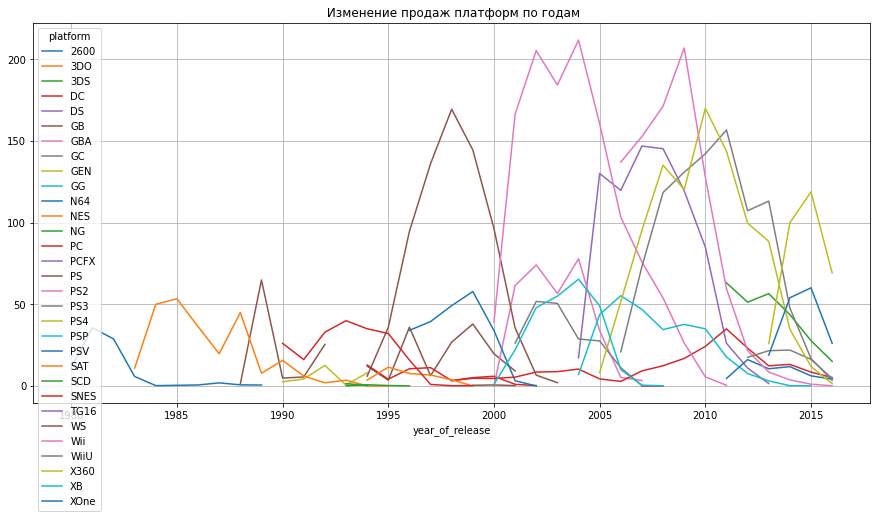

In [21]:
data_pl_all = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales',aggfunc='sum')
data_pl_all.plot(grid=True, figsize=(15, 7), title = ' Изменение продаж платформ по годам')
plt.show


**Видно, что в среднем платформы "живут" на рынке 10 лет, достигая пика популярности к середине жизни.**

##### Выберем топ-10 платформ с наибольшими суммарными продажами за все года и построим график их продаж по годам

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

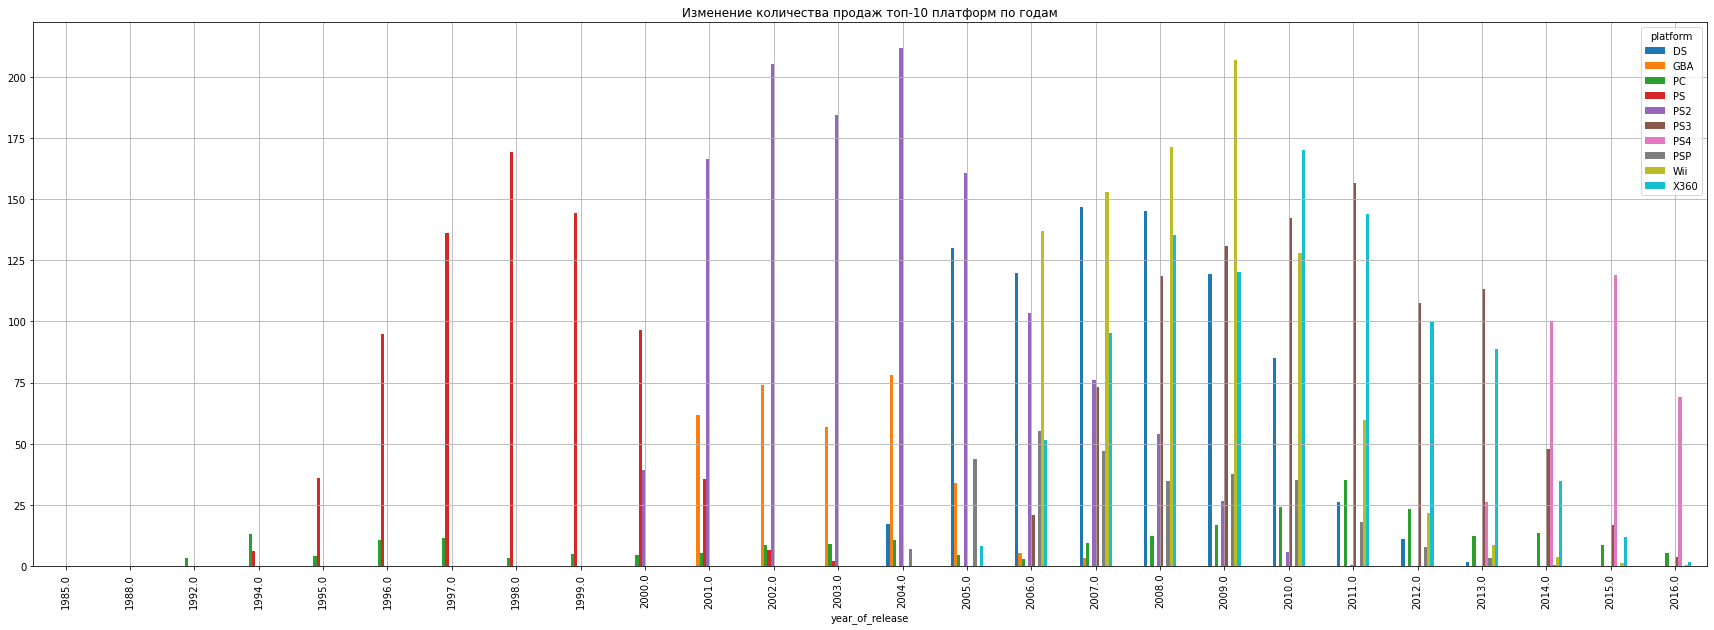

In [22]:

# Посмотрим, какие платформы были самыми продаваемыми:
data_pl_all = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
display (data_pl_all)
#Отсортируем исходный датафрэйм по интересующим нас платформам:
data_new_1 =data.query("platform == ['PS2','X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP','PC']")
#Построим график распределения продаж топ-10 платформ по годам:
data_new_1_gr  = data_new_1.pivot_table(index = 'year_of_release', columns = 'platform', values ='total_sales', aggfunc = 'sum').plot( kind = 'bar', figsize=(30,10), grid=True, title = 'Изменение количества продаж топ-10 платформ по годам')


#### Распределение самых популярных платформ в актуальном периоде

platform,year_of_release,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2014.0,43.76,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
1,2015.0,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2,2016.0,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


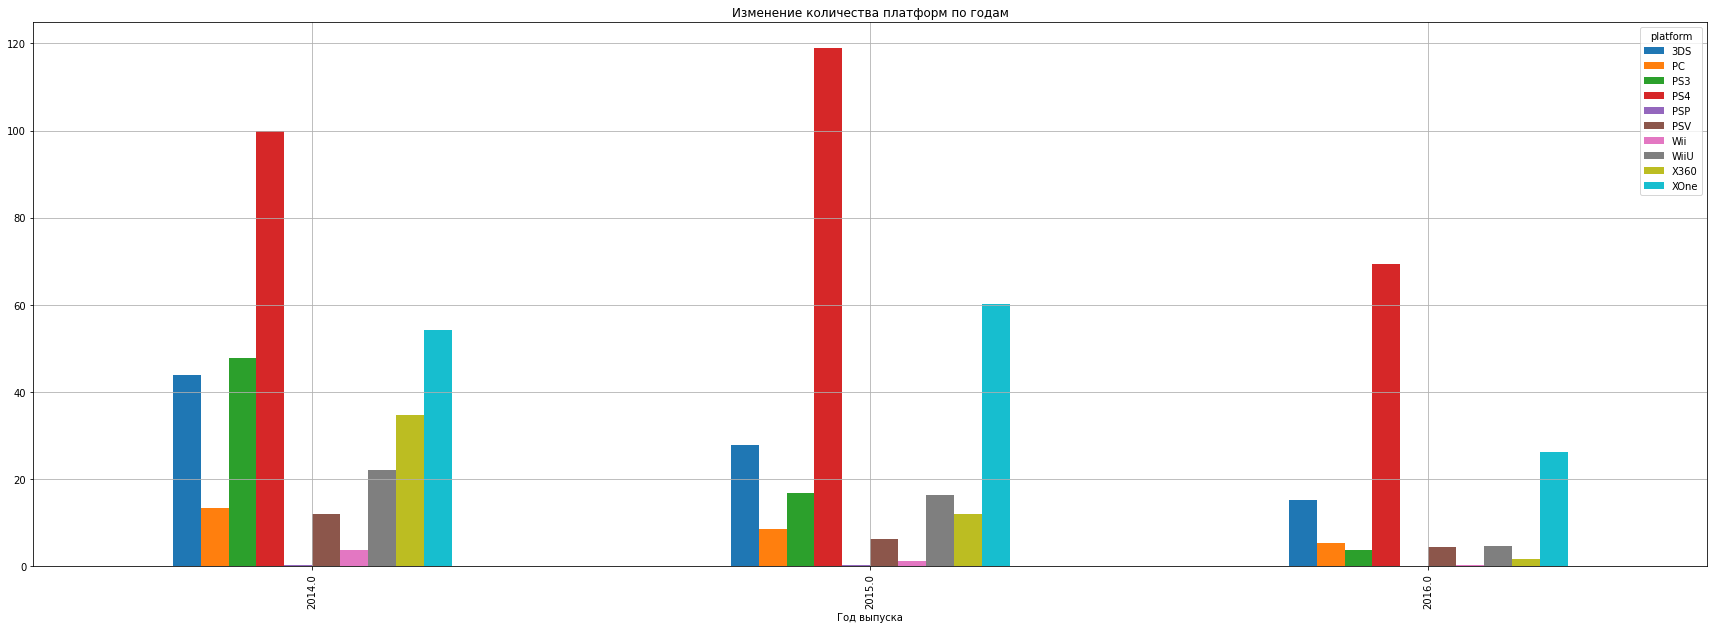

In [23]:
data_pl = data_new.pivot_table(index = 'year_of_release', columns = 'platform', values ='total_sales', aggfunc = 'sum').reset_index()

data_pl.plot( x = 'year_of_release',kind = 'bar', figsize=(30,10), grid=True, title = 'Изменение количества платформ по годам')
plt.xlabel('Год выпуска')
plt.show
display(data_pl.head(10))

**По графику видно, что самыми продаваемыми платформами являются PS4 и XOne. Если предположить, что данные за 2016 г предоставлены не полностью, то можно говорить, что у этих платформы положительная динамика продаж. На третьем месте по популярности - 3DS, но она, как и все оставшиеся платформы теряет популярность и скаждым годом продаётся всё меньше.
Платформа PSP безнадежно устарела, как и Wii. X360 и PS3 тоже стремительно теряют популярность.
Целесообразно для дальнейшего анализа и прогнозирования на 2017 год оставить тольео те платформы, которые всё ещё популярны и приносят значительную прибыль - это PS4, XOne и 3DS.Продажи платформы PSP и Wii стремятся к нулю**

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

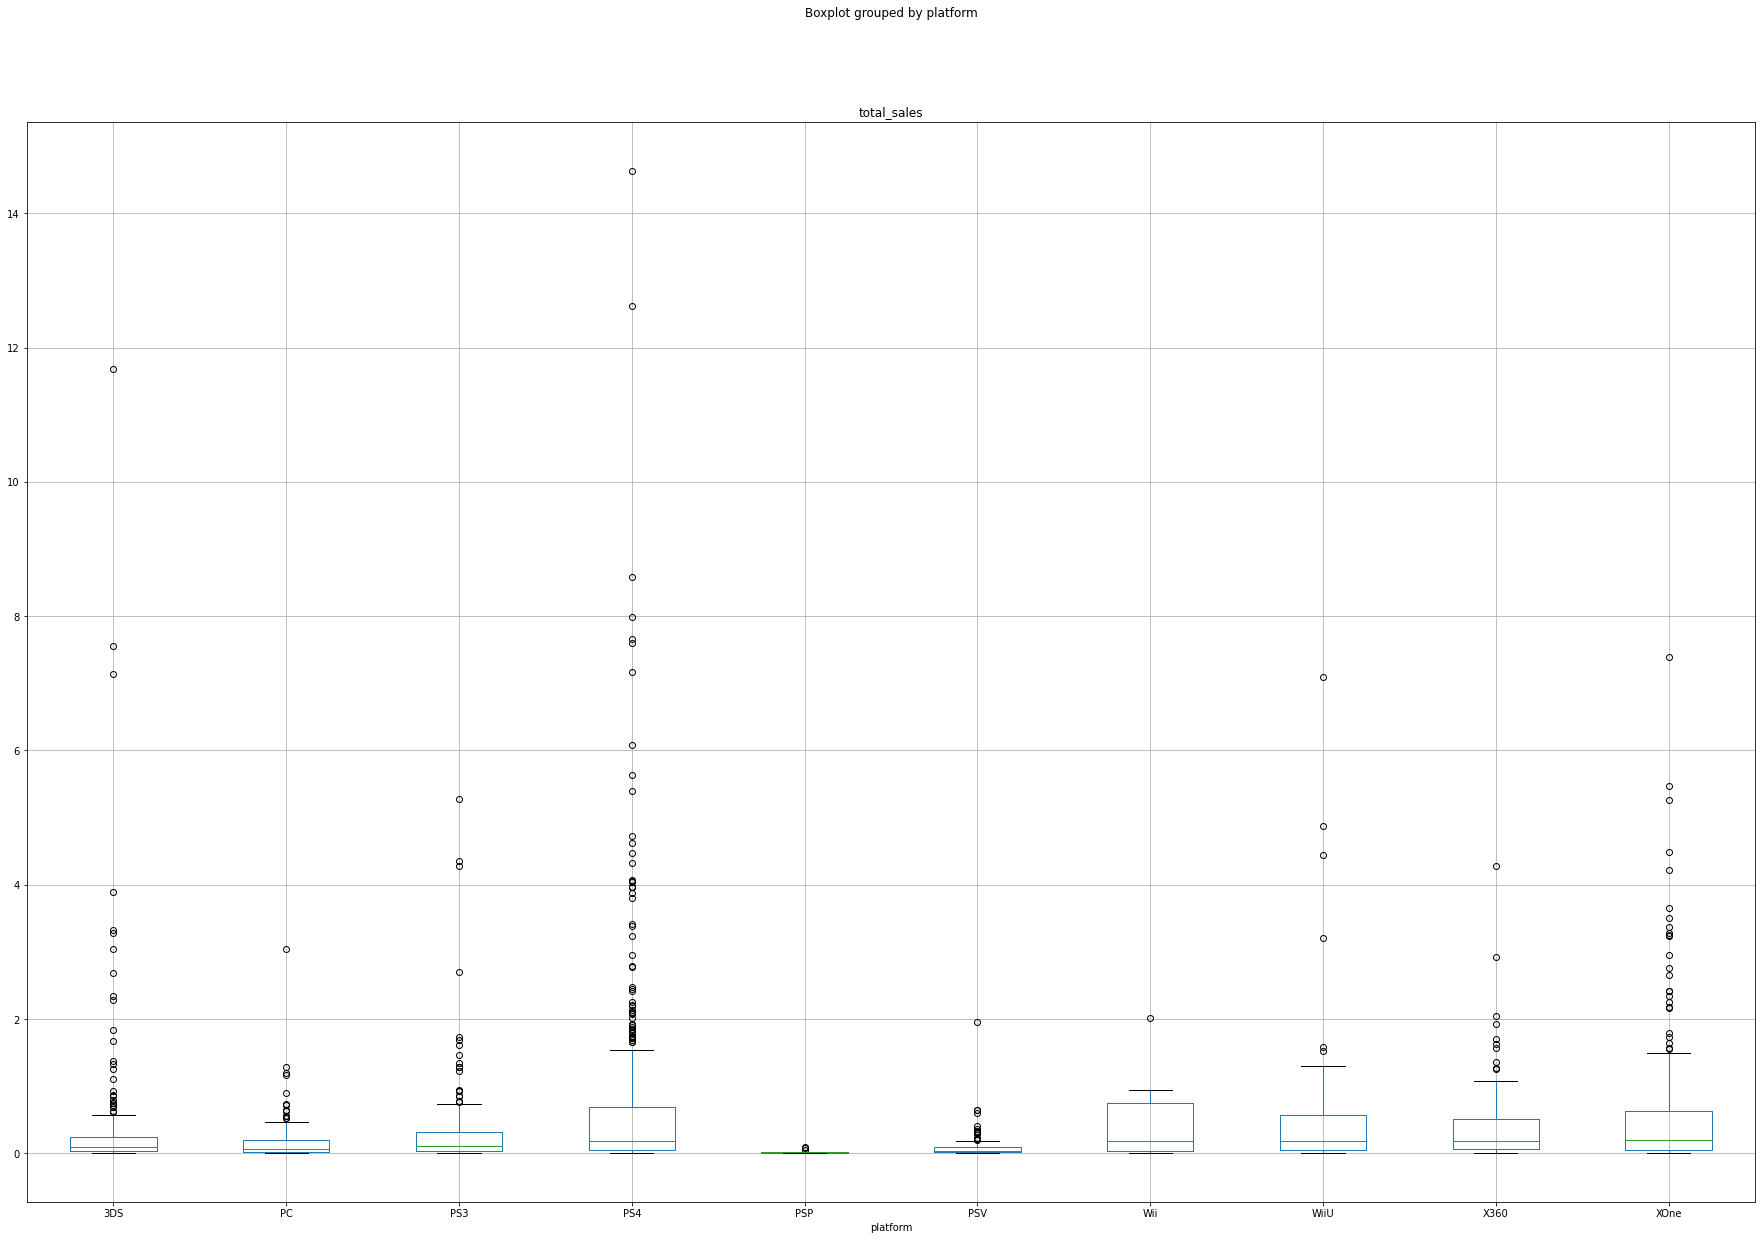

In [30]:

d1 = data_new.boxplot(column ='total_sales', by='platform',figsize=(30,20))
plt.show()


* На диаграммах размаха видно большое уоличество "выбросов". Отбросим их.


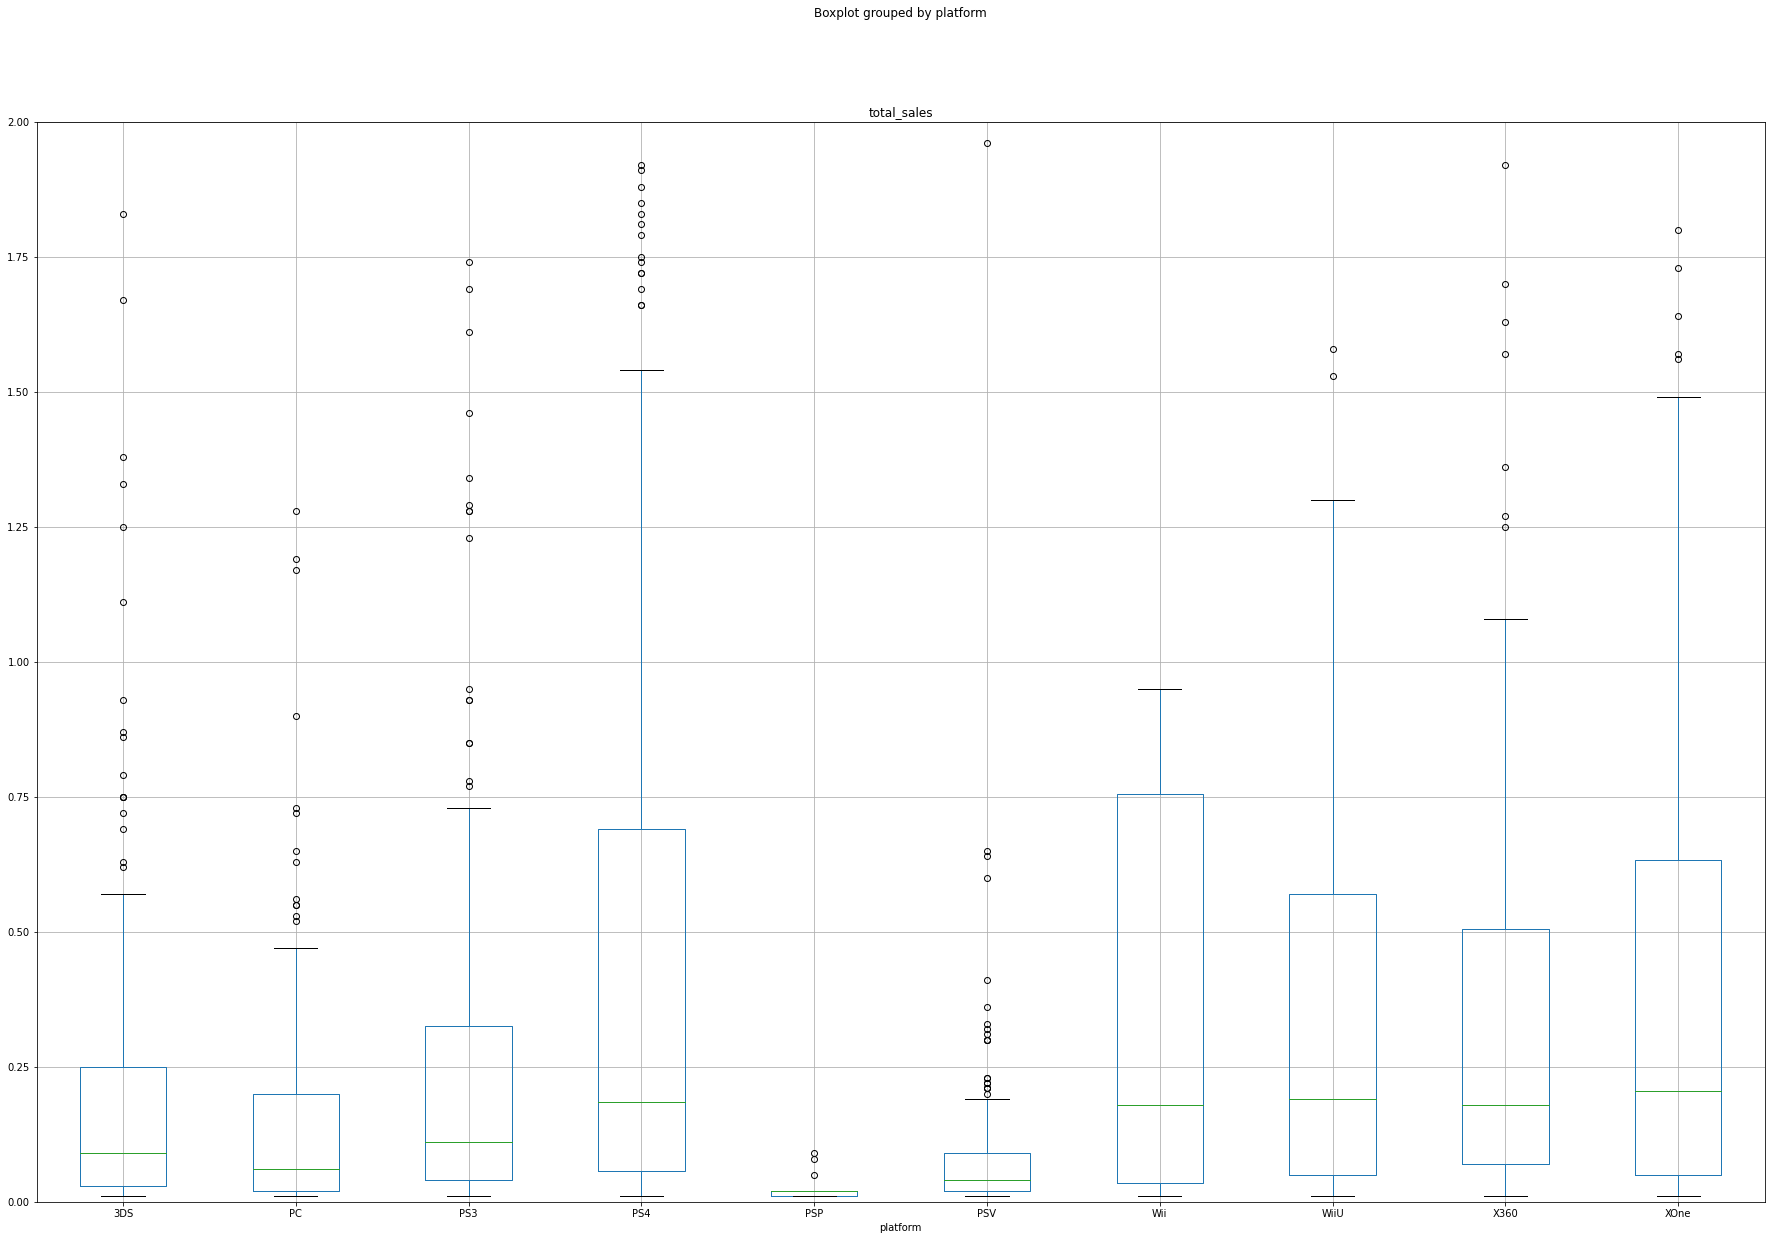

In [31]:
data_new.boxplot(column ='total_sales', by='platform',figsize=(30,20))

plt.ylim (0, 2) # Почему не работает ограничение по оси y?
plt.show()

* Выведем описание данных, использованных для диаграммы размаха

In [32]:
d_razn = data_new.groupby('platform')['total_sales'].describe()
display(d_razn)

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


 **На диаграмме размаха видно, больше всего игр продается на платформах PS4, XOne. Продажи на платформах PSV и PSP самые низкие. Медианы ТОП-платформ примерно равны 0.2 млн, у остальных платформ этот показатель ниже и вариьруется около 0.1 млн проданных экземпляров. Медианное значение говорит от том, что половина проданных игр на платформе принесли меньшую прибыль, а половина - большую.**

### Посмотрим, как влияют на продажи мнения критиков и пользователей

#### На примере самой популярной платформы - PS4

* Оставим в таблице только непустые строки с оценками пользователей по платформк PS4

In [33]:

data_ps4 = data_new.query("(platform =='PS4')& (user_score != -1)").dropna()


* Построим диаграмму рассеивания и посчитаем коререляцию оценки пользователей PS4

<AxesSubplot:title={'center':'Диаграмма рассеивания влияния оценки пользователей на продажи по платформе PS4'}, xlabel='user_score', ylabel='total_sales'>

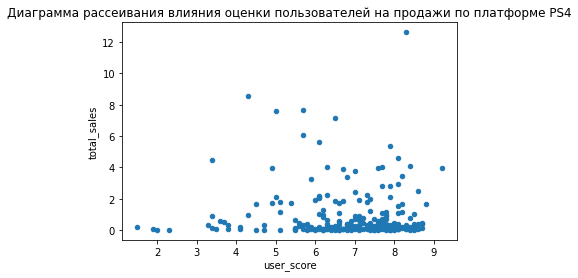

In [34]:
#Диаграмма рассеивания оценки пользователей
data_ps4.plot(x='user_score', y='total_sales', kind='scatter',title = "Диаграмма рассеивания влияния оценки пользователей на продажи по платформе PS4")

* Посчитаем корреляцю между оценкой пользователей и количеством продаж

In [35]:
print('Корреляция оценки пользователей и количества продаж', data_ps4['user_score'].corr(data_ps4['total_sales']))

Корреляция оценки пользователей и количества продаж -0.04318585997193634


* Построим диаграмму рассеивания и посчитаем коререляцию оценки критиков PS4

<AxesSubplot:title={'center':'Диаграмма рассеивания влияния оценки критиков на продажи по платформк PS4'}, xlabel='critic_score', ylabel='total_sales'>

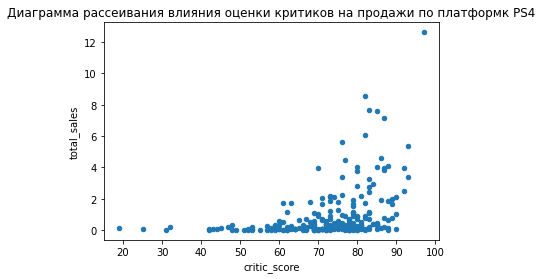

In [36]:
#Диаграмма рассеивания оценки критиков
data_ps4.plot(x='critic_score', y='total_sales', kind='scatter',title = "Диаграмма рассеивания влияния оценки критиков на продажи по платформк PS4")

* Посчитаем корреляцю между оценкой критиков и количеством продаж

In [37]:
print('Корреляция оценки критиков и количества продаж', data_ps4['critic_score'].corr(data_ps4['total_sales']))

Корреляция оценки критиков и количества продаж 0.40190287811475334


**Как мы видима из диаграмм рассеивания на продажи по платформе PS4 мнения пользователей не влияют, корреляция слобоотрицательная. Мнения критиков оказывают бОльшее влияния по количество продаж, корреляция не очень сильная, но весомо положительная.**

#### Посмотрим, как влияет мнение критиков и пользователей на продажи по другим платформам

* Сделаем выборку по 5 другим платформам

In [38]:
data_pl_other= data_new.query("(platform ==['XOne','X360','PSV','Wii','3DS'])& (user_score != -1 )").dropna()
data_pl_xone= data_new.query("(platform =='XOne')& (user_score != -1)").dropna()
data_pl_X360= data_new.query("(platform =='X360')& (user_score != -1)").dropna()
data_pl_PSV= data_new.query("(platform =='PSV')& (user_score != -1)").dropna()
data_pl_PC = data_new.query("(platform =='PC')& (user_score != -1)").dropna()
data_pl_3DS = data_new.query("(platform =='3DS')& (user_score != -1)").dropna()

* Построим диаграммы рассеивания оценки пользователей 

<AxesSubplot:title={'center':'Диаграмма рассеивания влияния оценки пользователей на продажи по платформк 3DS'}, xlabel='user_score', ylabel='total_sales'>

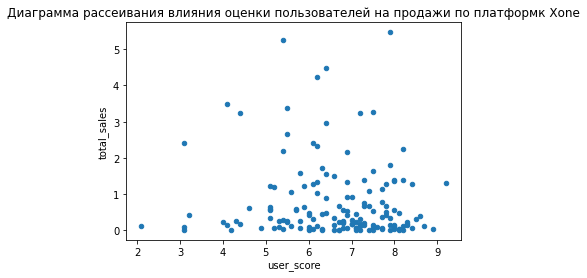

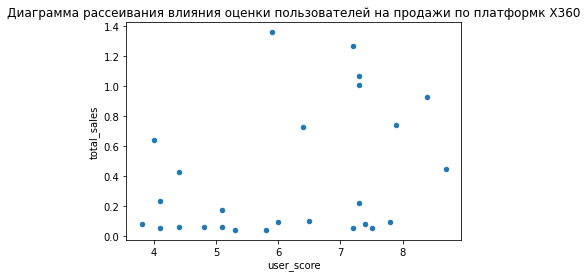

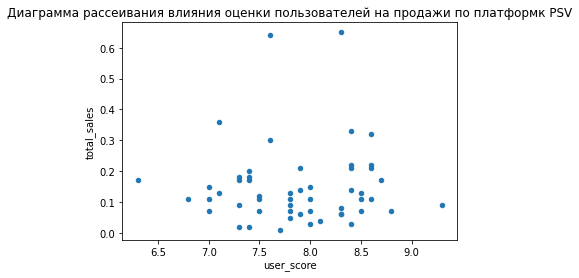

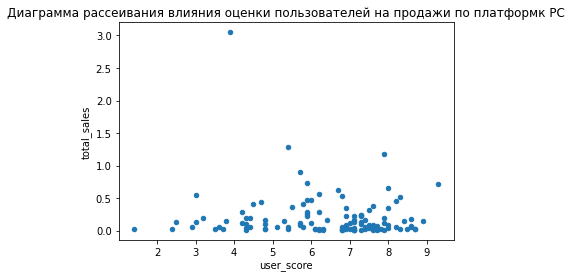

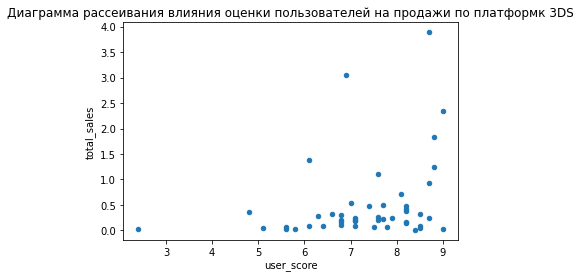

In [39]:
#data_pl_other.plot(x='user_score', y='total_sales', kind='scatter')
data_pl_xone.plot(x='user_score', y='total_sales', kind='scatter', title = "Диаграмма рассеивания влияния оценки пользователей на продажи по платформк Xone")
data_pl_X360.plot(x='user_score', y='total_sales', kind='scatter',title = "Диаграмма рассеивания влияния оценки пользователей на продажи по платформк X360")
data_pl_PSV.plot(x='user_score', y='total_sales', kind='scatter',title = "Диаграмма рассеивания влияния оценки пользователей на продажи по платформк PSV")
data_pl_PC.plot(x='user_score', y='total_sales', kind='scatter', title = "Диаграмма рассеивания влияния оценки пользователей на продажи по платформк PC")
data_pl_3DS.plot(x='user_score', y='total_sales', kind='scatter',title = "Диаграмма рассеивания влияния оценки пользователей на продажи по платформк 3DS")

* Посчитаем корреляцю между оценкой пользователей и количеством продаж

In [40]:
print('Корреляция оценки пользователей и количества продаж', data_pl_other['user_score'].corr(data_pl_other['total_sales']))

Корреляция оценки пользователей и количества продаж -0.08371600106766941


* Построим диаграмму рассеивания оценки критиков 

<AxesSubplot:title={'center':'Диаграмма рассеивания влияния оценки критиков на продажи по платформк 3DS'}, xlabel='critic_score', ylabel='total_sales'>

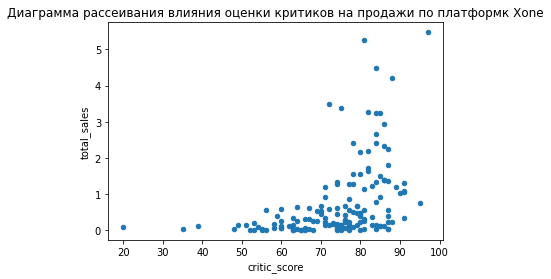

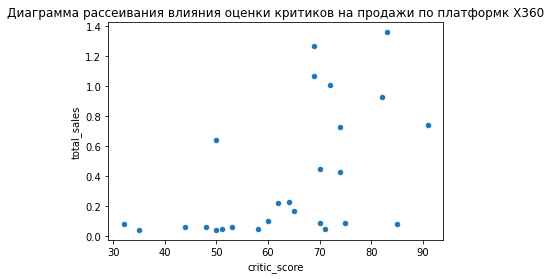

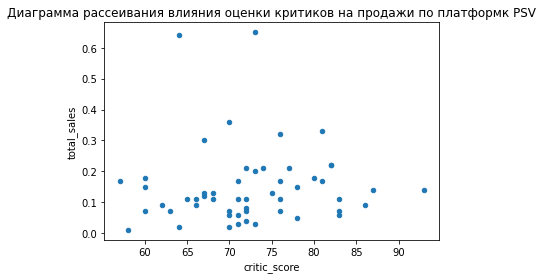

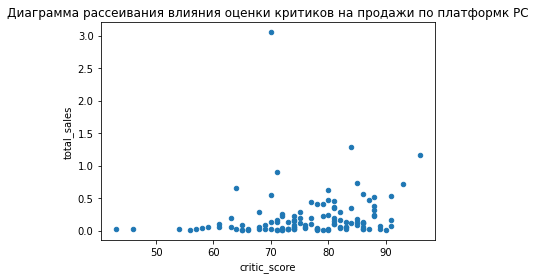

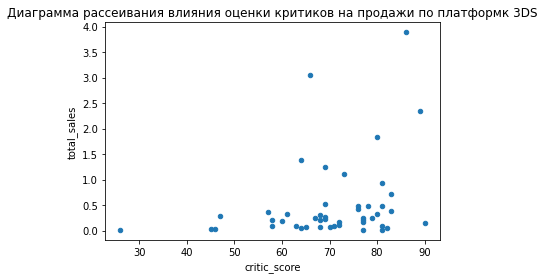

In [41]:
data_pl_xone.plot(x='critic_score', y='total_sales', kind='scatter', title = "Диаграмма рассеивания влияния оценки критиков на продажи по платформк Xone")
data_pl_X360.plot(x='critic_score', y='total_sales', kind='scatter',title = "Диаграмма рассеивания влияния оценки критиков на продажи по платформк X360")
data_pl_PSV.plot(x='critic_score', y='total_sales', kind='scatter',title = "Диаграмма рассеивания влияния оценки критиков на продажи по платформк PSV")
data_pl_PC.plot(x='critic_score', y='total_sales', kind='scatter', title = "Диаграмма рассеивания влияния оценки критиков на продажи по платформк PC")
data_pl_3DS.plot(x='critic_score', y='total_sales', kind='scatter',title = "Диаграмма рассеивания влияния оценки критиков на продажи по платформк 3DS")

* Посчитаем корреляцю между оценкой пользователей и количеством продаж

In [42]:
print('Корреляция оценки критиков и количества продаж', data_pl_other['critic_score'].corr(data_pl_other['total_sales']))

Корреляция оценки критиков и количества продаж 0.37855511425324384


**По выбранным платформам корреляция между продажами и оценками пользователей стремиться к 0,является слабоотрицательной. Оценка критиков влияет на продажи существеннее, особенно на продажи по платформе XOne. Корреляция близка к значению по выбранной изначально самой порулярной платформе PS4. Вцелом, картина вляния мнения критиков и пользователей на продажи по выбранным платформам схожа. Так что можно говорить о том, что при выборе платформы пользователи в незначительной мере ориентируются на мнения критиков, а на мнения других пользователей внимания практически не обращают.**

### Посмотрим, как игры распределены по жанрам.

<function matplotlib.pyplot.show(close=None, block=None)>

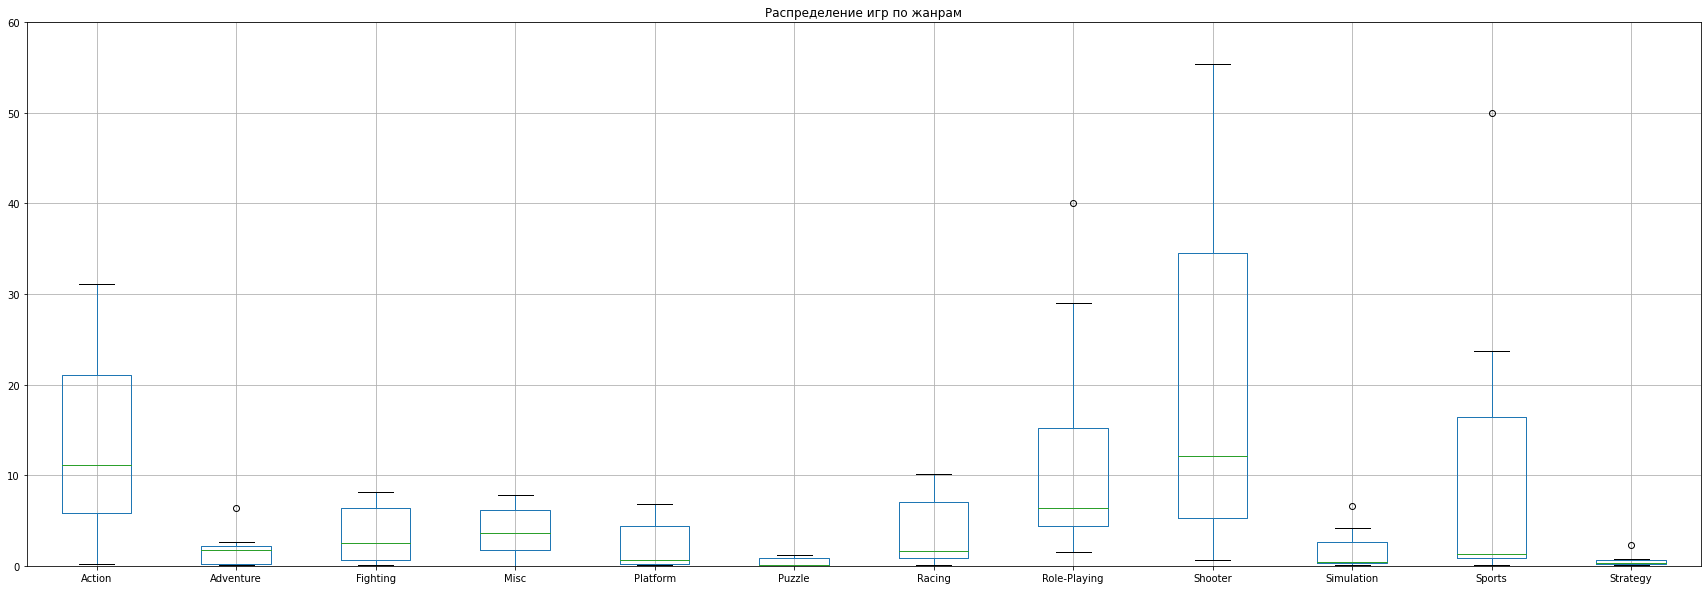

In [47]:

data_g_all = data_new.pivot_table(index = 'platform', columns = 'genre', values = 'total_sales',aggfunc='sum').reset_index()
data_g_all.plot(kind = 'box',figsize=(30,10), grid=True, title = 'Распределение игр по жанрам')
plt.ylim(0,60)
plt.show

**Исходя из получившейся диаграммы можо сделать вывод, что в актуальном периоде самыми популярными жанрами являются Shooter, Action (больше половины игр в этих жанрах продуются более чем в 10 млн копий) ,Role-Playing.  Shooter среди топ-жанров лидирует по количеству проданных копий в 2 раза.  Наименее прибыльные жанры - Puzzle, Strategy и Adventure.**


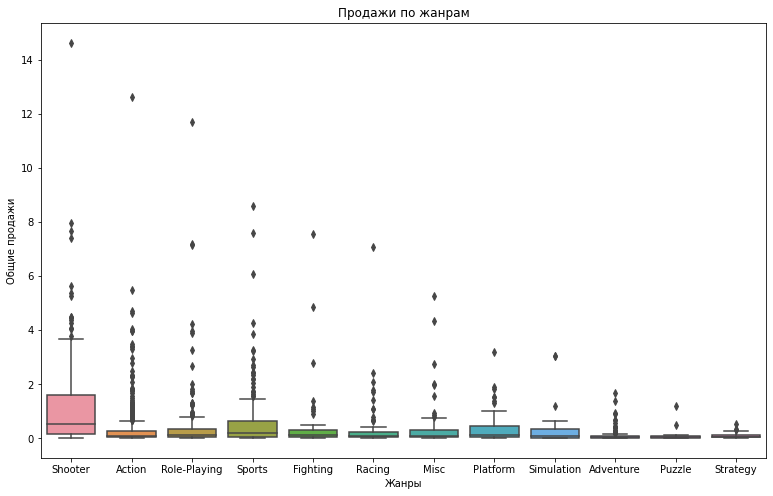

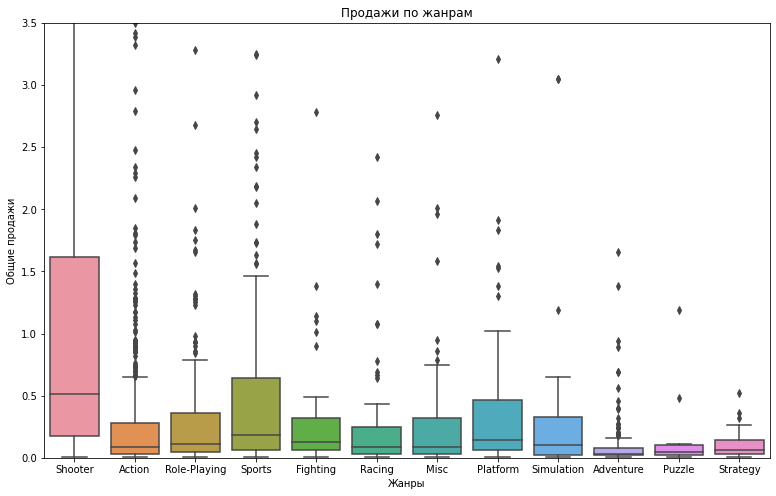

In [80]:

import seaborn as sns
data_temp, y = data_new, 'total_sales'
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи'))
plt.show()
plt.figure(figsize=(13, 8))
(sns.boxplot(data = data_temp, y = y, x='genre')
    .set(title = 'Продажи по жанрам', xlabel = 'Жанры', ylabel = 'Общие продажи', ylim=(0, 3.5)))
plt.show()

## Составим портрет пользователя каждого региона

### Пользователи региона Северная Америка

#### Популярные платформы

In [49]:
data_pl_na = data_new.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index()
display ('Всего платформ:', len(data_pl_na))
#ТОП 5 попуярных платформ
data_pl_na_5 = data_pl_na.head(5)
display ('Самые популярные платформы в Северной Америке:',data_pl_na_5['platform'].head(5))



'Всего платформ:'

10

'Самые популярные платформы в Северной Америке:'

0     PS4
1    XOne
2    X360
3     3DS
4     PS3
Name: platform, dtype: object

* Построим круговую диаграмму для наглядности в разницы долей продаж

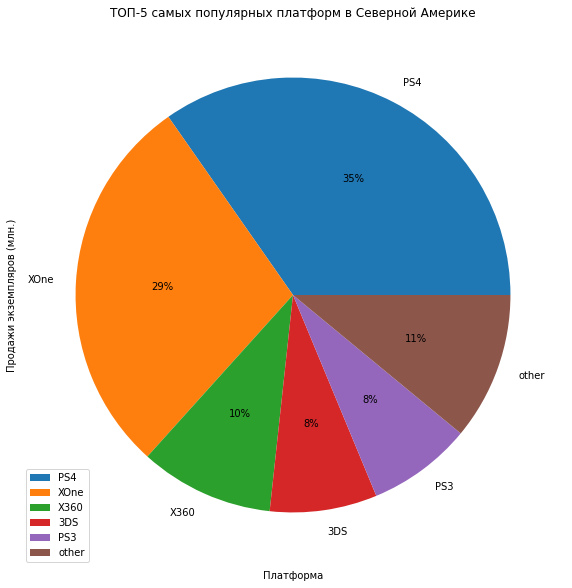

In [50]:

#Соберем продажи по оставшимся платформам в отдельную строку
data_pl_na_other =data_pl_na.tail(5).reset_index()

data_pl_na_5_d = data_pl_na_5.append({'platform':'other','na_sales':sum( data_pl_na_other['na_sales'])},ignore_index=True).set_index('platform')

data_pl_na_5_d.plot.pie( x ='platform',y = 'na_sales', autopct='%1.0f%%', figsize=(30,10), grid=True, title = 'ТОП-5 самых популярных платформ в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**На диаграмме видно, что самая прибыльная платформа в Северной Америке в 2014 - 2016 гг - PS4, за ней лидирует XOne. На третьем месте по пулярности - X360. Четвертое и пятое место практически равных делят 3DS и PS3. На долю всех остальных платформ приходится 11 % рынка.**

#### Самые популярные жанры в Северной Америке

In [51]:
data_g_na = data_new.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index()
display ('Всего жанров:', len(data_g_na))
data_g_na_5 = data_g_na.head(5)
display ('Самые популярные жанры в Северной Америке:',data_g_na_5.head(5))


'Всего жанров:'

12

'Самые популярные жанры в Северной Америке:'

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05
other,37.86


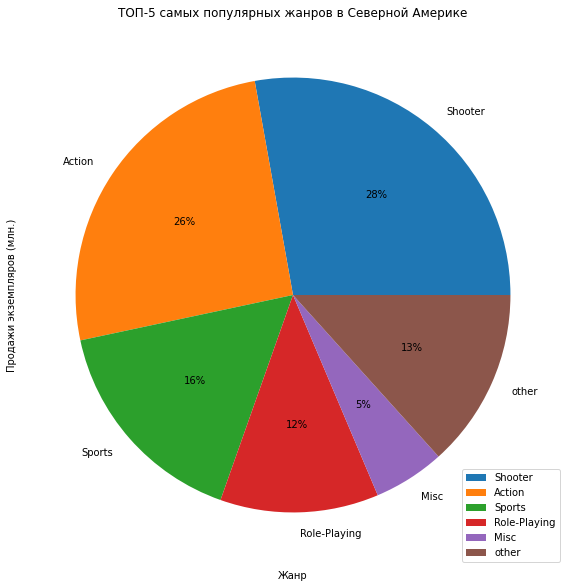

In [52]:
data_g_na_other =data_g_na.tail(7).reset_index()
data_g_na_5_d = data_g_na_5.append({'genre':'other','na_sales':sum( data_g_na_other['na_sales'])},ignore_index=True).set_index('genre')
display (data_g_na_5_d )

data_g_na_5_d.plot( kind = 'pie',y = 'na_sales', autopct='%1.0f%%', figsize=(30,10), grid=True, title = 'ТОП-5 самых популярных жанров в Северной Америке')

plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Самый популярный жанр - Shooter, его продажи за 2014-2016г в Америке - 28% (79 млн.проданных экземпляров) от продаж всего рынка игр. На втором месте -  Action с 72 млн, на третьем -Sports с 46 млн продаж. Замыкает пятёрку лидеров - Misc - его продажи чуть более 15 млн экземпляров.**

#### Влияние рейтинга ESRB на продажи в Северной Америке

rating
M       96.42
-1      64.72
E       50.74
T       38.95
E10+    33.23
Name: na_sales, dtype: float64

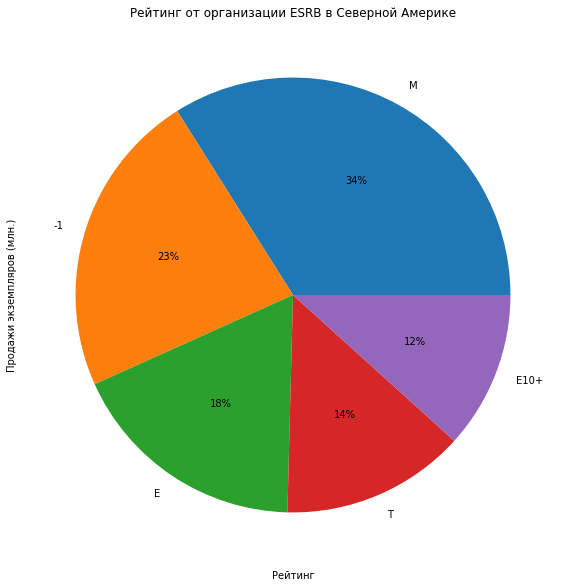

In [53]:
data_rait_na = data_new.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

display(data_rait_na) 
#построим гистограмму
data_rait_na.plot( kind = 'pie', y = 'na_sales', figsize=(30,10),autopct='%1.0f%%', grid=True, title = 'Рейтинг от организации ESRB в Северной Америке')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Игр с рейтингом М - для взрослых - было продано за 2014 - 2016 гг почи в 3 раза больше, чем игр с рейтингом Е10+, рассчитанных на детей. На втором месте игры без маркировки - 23% доли рынка. Игры для всех возрастов с рейтингом Е чуть опережают детские игры те, что рассчитаны на подростков - почти 39 млн проданых экземпляров.**

### Пользователи региона Европа

#### Самые популярные платформы

In [54]:

data_pl_eu = data_new.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index()
display ('Всего платформ:', len(data_pl_eu))
#ТОП 5 попуярных платформ
data_pl_eu_5 = data_pl_eu.head(5)
display ('Самые популярные платформы в Европе:',data_pl_eu_5['platform'].head(5))


'Всего платформ:'

10

'Самые популярные платформы в Европе:'

0     PS4
1    XOne
2     PS3
3      PC
4     3DS
Name: platform, dtype: object

* Построим круговую диаграмму для наглядности в разницы долей продаж 

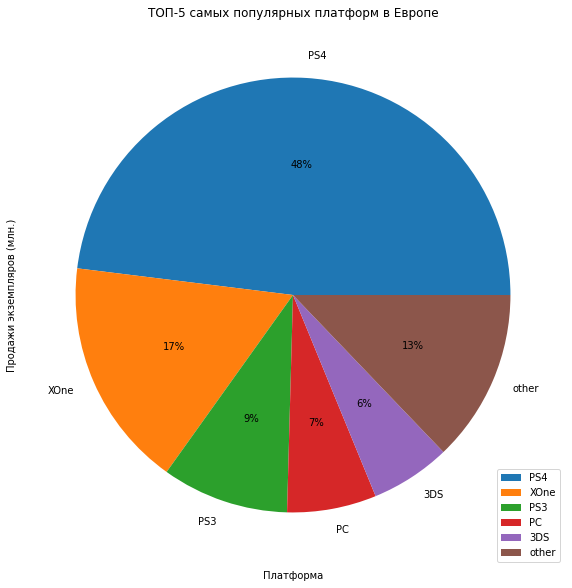

In [55]:

#Соберем продажи по оставшимся платформам в отдельную строку
data_pl_eu_other =data_pl_eu.tail(5).reset_index()

data_pl_eu_5_d = data_pl_eu_5.append({'platform':'other','eu_sales':sum( data_pl_eu_other['eu_sales'])},ignore_index=True).set_index('platform')

data_pl_eu_5_d.plot.pie( y = 'eu_sales', autopct='%1.0f%%', figsize=(30,10), grid=True, title = 'ТОП-5 самых популярных платформ в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

С сильным отрывом на рынке Европы лидирует PS4. Далее с отставанием чуть более чем в  80 млн продаж популярна Х360. На третьем месте PS3. И замыкают пятерку топ-платформ PC и 3DS с показателем около 17 млн продаж.

#### Самые популярные жанры В Европе

In [56]:
data_g_eu = data_new.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index()
display ('Всего жанров:', len(data_g_eu))
data_g_eu_5 = data_g_eu.head(5)
display ('Самые популярные жанры в  Европе:',data_g_eu_5.head(5))


'Всего жанров:'

12

'Самые популярные жанры в  Европе:'

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13
other,42.45


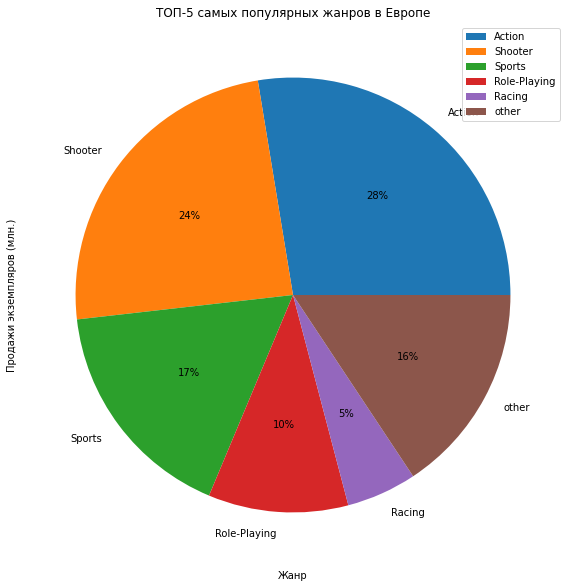

In [57]:
data_g_eu_other =data_g_eu.tail(7).reset_index()
data_g_eu_5_d = data_g_eu_5.append({'genre':'other','eu_sales':sum( data_g_eu_other['eu_sales'])},ignore_index=True).set_index('genre')
display (data_g_eu_5_d )

data_g_eu_5_d.plot( kind = 'pie',y = 'eu_sales', autopct='%1.0f%%', figsize=(30,10), grid=True, title = 'ТОП-5 самых популярных жанров в Европе')

plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Самым популярным жанром в Европе является Action c продажами почти в 75 млн экземпляров. На втором месте популярен -Shooter - около 65 млн продаж, на тертьем месте - Sports . Замыкает пятерку продаж Racing. Надо отметить, что 16% рынка игр занимают другие жанры**

#### Влияние рейтинга ESRB на продажи в Европе

rating
M       93.44
-1      58.95
E       58.06
T       34.07
E10+    26.16
Name: eu_sales, dtype: float64

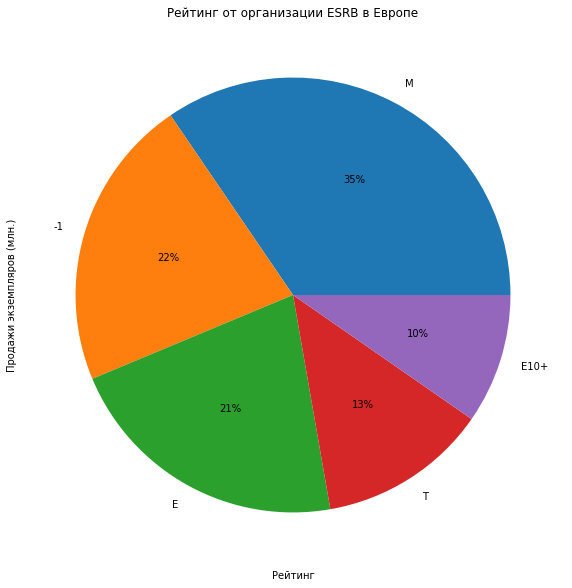

In [58]:
data_rait_eu = data_new.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
display(data_rait_eu) 
#построим гистограмму
data_rait_eu.plot( kind = 'pie', y = 'eu_sales', figsize=(30,10),autopct='%1.0f%%', grid=True, title = 'Рейтинг от организации ESRB в Европе')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Ситуация похожа на картину в Северной Америке. Максимальные продажи у игр с рейтингом для взрослых -М, минимальные - для детей (Е10+). Игры для подростков менее популярны, чем игры, с рейтингом Е, но популярнее игр для детей. 22% рынка (около 58 млн экземпляров) было продано игр без маркировки.**

### Пользователи региона Япония

#### Самые популярные платформы

In [59]:
data_pl_jp = data_new.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index()
display ('Всего платформ:', len(data_pl_jp))
#ТОП 5 попуярных платформ
data_pl_jp_5 = data_pl_jp.head(5)
display ('Самые популярные платформы в Японии:',data_pl_jp_5['platform'].head(5))

'Всего платформ:'

10

'Самые популярные платформы в Японии:'

0     3DS
1     PS4
2     PSV
3     PS3
4    WiiU
Name: platform, dtype: object

* Построим круговую диаграмму для наглядности в разницы долей продаж 

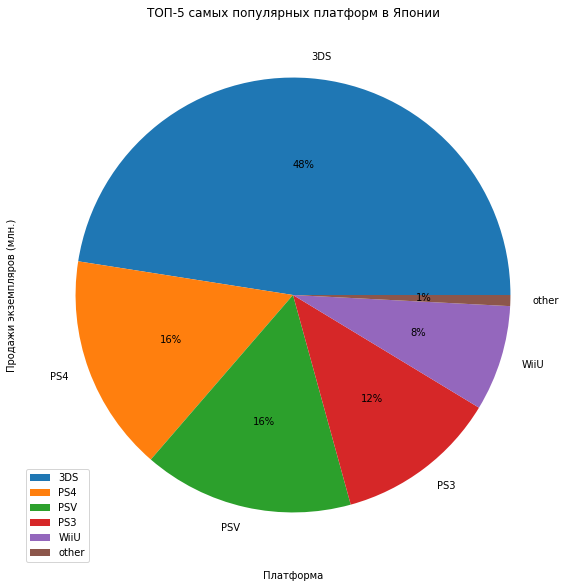

In [60]:

#Соберем продажи по оставшимся платформам в отдельную строку
data_pl_jp_other =data_pl_jp.tail(5).reset_index()

data_pl_jp_5_d = data_pl_jp_5.append({'platform':'other','jp_sales':sum( data_pl_jp_other['jp_sales'])},ignore_index=True).set_index('platform')

data_pl_jp_5_d.plot.pie( x ='platform',y = 'jp_sales', autopct='%1.0f%%', figsize=(30,10), grid=True, title = 'ТОП-5 самых популярных платформ в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самая популярная платформа среди Японцев - 3DS (44.24млн экземпляров), далее с показателем почти в 30 млн проданных экземпляров идут PS4, PSV. PS3 занимает четвертое место в рейтинге популярности, а замыкает пятерку - Wii со 7.31 млн продаж

#### Самые популярные жанры

In [61]:
data_g_jp = data_new.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index()
display ('Всего жанров:', len(data_g_jp))
data_g_jp_5 = data_g_jp.head(5)
display ('Самые популярные жанры в Японии:',data_g_jp_5.head(5))

'Всего жанров:'

12

'Самые популярные жанры в Японии:'

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87
other,15.50


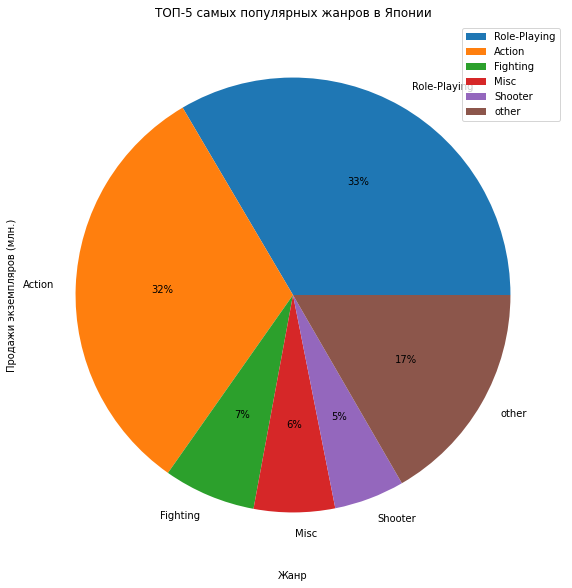

In [62]:
data_g_jp_other =data_g_jp.tail(7).reset_index()
data_g_jp_5_d = data_g_jp_5.append({'genre':'other','jp_sales':sum( data_g_jp_other['jp_sales'])},ignore_index=True).set_index('genre')
display (data_g_jp_5_d )

data_g_jp_5_d.plot( kind = 'pie',y = 'jp_sales', autopct='%1.0f%%', figsize=(30,10), grid=True, title = 'ТОП-5 самых популярных жанров в Японии')

plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**В Японии лидируют жанры Role-Playing и Action  - в среднем 30 млн продаж. Совсем не большая разница между третьим (Fighting), четвертым	(Misc) и пятым (Shooter) по популярности жанрами. Их продажи в среднем за 2014-2016 гг составили 5.61 млн продаж**

#### Влияние рейтинга ESRB на продажи в Японии

rating
-1      56.90
T       14.78
E        8.94
M        8.01
E10+     4.46
Name: jp_sales, dtype: float64

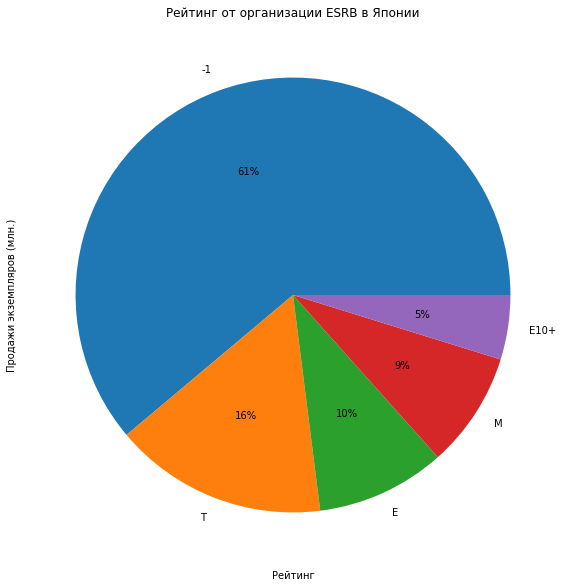

In [63]:
data_rait_jp = data_new.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
display(data_rait_jp) 
#построим гистограмму
data_rait_jp.plot( kind = 'pie', y = 'jp_sales', figsize=(30,10),autopct='%1.0f%%', grid=True, title = 'Рейтинг от организации ESRB в Японии')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

In [64]:
temp = data_new.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


-1      749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

**Самые высокие продажи у игр без реётинка - 61% всех продаж.Игры, рассчитанные на подростков - с рейтингом Т- на втором месте по популрности..Игры с рейтингом Е и М имеют примерно одинаковые показатели продаж. Игры, рассчитанные на детей приносят наименьшую прибыль.**

### Жители других стран

#### Самые популярные платформы

In [65]:
data_pl_other = data_new.groupby('platform')['other_sales'].sum().sort_values(ascending=False).reset_index()
display ('Всего платформ:', len(data_pl_other))
#ТОП 5 попуярных платформ
data_pl_other_5 = data_pl_other.head(5)
display ('Самые популярные платформы в других странах:',data_pl_other_5['platform'].head(5))

'Всего платформ:'

10

'Самые популярные платформы в других странах:'

0     PS4
1    XOne
2     PS3
3    X360
4     3DS
Name: platform, dtype: object

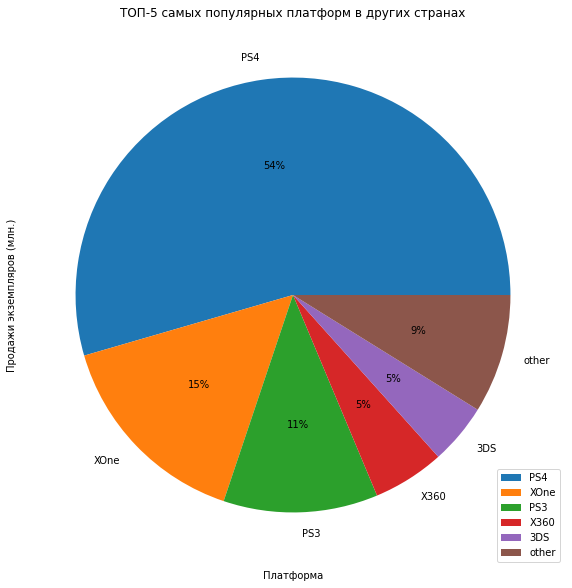

In [66]:

#Соберем продажи по оставшимся платформам в отдельную строку
data_pl_other_other =data_pl_other.tail(5).reset_index()

data_pl_other_5_d = data_pl_other_5.append({'platform':'other','other_sales':sum( data_pl_other_other['other_sales'])},ignore_index=True).set_index('platform')

data_pl_other_5_d.plot.pie( x ='platform',y = 'other_sales', autopct='%1.0f%%', figsize=(30,10), grid=True, title = 'ТОП-5 самых популярных платформ в других странах')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Платформа')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Самая популярная платформа - PS4 -44.48 млн. проданных экземпляров, на втором месте с сильным отставанием ХОne - 12.52 млн, на третьем месте PS3 - 9.37 млн. Замыкают ТОП-5 популярных платформ Х360 и 3DS.**

#### Самые популярные жанры

In [67]:
data_g_other = data_new.groupby('genre')['other_sales'].sum().sort_values(ascending=False).reset_index()
display ('Всего жанров:', len(data_g_other))
data_g_other_5 = data_g_other.head(5)
display ('Самые популярные жанры в других странах:',data_g_other_5.head(5))

'Всего жанров:'

12

'Самые популярные жанры в других странах:'

,genre,other_sales
0,Action,22.57
1,Shooter,21.53
2,Sports,14.36
3,Role-Playing,8.64
4,Misc,4.03


,other_sales
genre,
Action,22.57
Shooter,21.53
Sports,14.36
Role-Playing,8.64
Misc,4.03
other,10.49


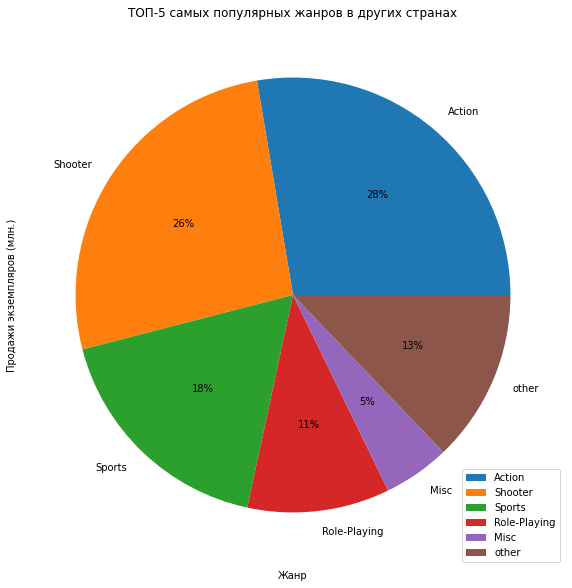

In [68]:
data_g_other_other =data_g_other.tail(7)
data_g_other_5_d = data_g_other_5.append({'genre':'other','other_sales':sum( data_g_other_other['other_sales'])},ignore_index=True).set_index('genre')
display (data_g_other_5_d )

data_g_other_5_d.plot( kind = 'pie',y = 'other_sales', autopct='%1.0f%%', figsize=(30,10), grid=True, title = 'ТОП-5 самых популярных жанров в других странах')

plt.xlabel('Жанр')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

Самый популярный жанр - Action (22.57 млн), почти так же популярен Shooter - 21.53 млн. проданых экземпляров. На третьем месте по популярности - Sports, ему значительно уступают 	Role-Playing и Misc, занимающие соответственно четвертое и пятое место в списке самых популярных жанров за 2014-2016 гг в других странах.

#### Влияние рейтинга ESRB на продажи в других странах

rating
M       28.67
-1      18.40
E       15.39
T       11.33
E10+     7.83
Name: other_sales, dtype: float64

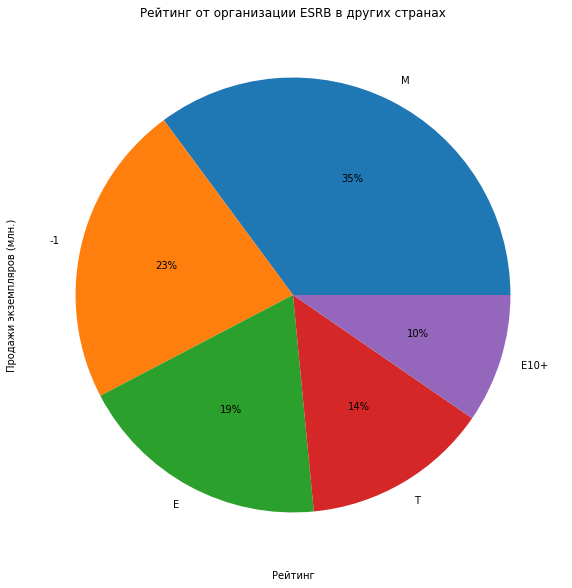

In [69]:
data_rait_other= data_new.groupby('rating')['other_sales'].sum().sort_values(ascending=False)

display(data_rait_other) 
#построим гистограмму

data_rait_other.plot( kind = 'pie', y = 'other_sales', figsize=(30,10),autopct='%1.0f%%', grid=True, title = 'Рейтинг от организации ESRB в других странах')
#меняем наименование горизонтальной линии ('X')
plt.xlabel('Рейтинг')
#меняем наименование вертикальной линии ('Y')
plt.ylabel('Продажи экземпляров (млн.)')
plt.show()

**Чаще всего продаются игры для взрослых- 28.67 млн продаж. На втором месте игры без рейтинга - 23% всех продаж. Чуть отстают игры с рейтингом Т. Реже всего продаются игры с рейтингом E10+**

## ПРОВЕРКА ГИПОТЕЗ

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую и альтернативную гипотезы:
Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.
Для проверки гипотез найдём средний пользовательский рейтинг для каждой из указанных платформ  и используя специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, проверим гипотезу

In [70]:
import scipy
from scipy import stats as st

* Создадим выборку с оценками пользователей для платформы Xbox:

In [71]:
xbox_r = data_new.query("(platform == 'XOne') & (user_score!= -1 )")['user_score'].dropna()

* Создадим выборку с оценками пользователей для платформы PC:

In [72]:
pc_r = data_new.query("(platform == 'PC')& (user_score!= -1 )")['user_score'].dropna()

* Посмотрим сколько элементов в выборках, чтобы понять насколько они большие и сильно ли различаются. Эти показатели могут влиять на оправданность применения теста.

In [73]:
print (len(xbox_r))
print (len(pc_r))


165
122


* Проведем  двусторонний t-тест Стьюдента

In [74]:
# Критический уровень статистическоц значимости
alpha =0.05 
# Проведем тест:
results = st.ttest_ind (xbox_r, pc_r)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


**Выборки проучились достаточно большие для того, чтобы можно было провести корректный тест. Исходя из его результатов будем придерживаться нулевой гипотезы:**

    средние пользовательские рейтинги платформ Xbox One и PC одинаковые

### Пользовательские рейтинги жанров Action и Sports разные

Сформулируем нулевую и альтернативную гипотезы:
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые
Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные.
Для проверки гипотез найдём средний пользовательский рейтинг для каждого из указанных жанров  и используя специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, проверим гипотезу

* Создадим выборку с оценками пользователей для жанра Action:

In [76]:
act_r = data_new.query("(genre == 'Action') & (user_score!= -1)")['user_score'].dropna()

*  Создадим выборку с оценками пользователей для жанра Sports:

In [77]:
sp_r = data_new.query("(genre  == 'Sports')&(user_score!= -1)")['user_score'].dropna()

* Посмотрим сколько элементов в выборках, чтобы понять насколько они большие и сильно ли различаются. Эти показатели могут влиять на оправданность применения теста.

In [78]:

print (len(act_r))
print (len(sp_r))


297
127


* Проведем  двусторонний t-тест Стьюдента

In [79]:
# Критический уровень статистическоц значимости
alpha = 0.05 
# Проведем тест:
results = st.ttest_ind (act_r, sp_r)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


**Выборки проучились достаточно большие для того, чтобы можно было провести корректный тест. Исходя из его результатов следует отвергнуть нулевую гипотезу и придерживаться мнения, что**

    средние пользовательские рейтинги жанров Action и Sports разные

## ОБЩИЙ ВЫВОД

Передо мной была поставлена задача проанализировать данные из открытх источников с целью выявить определяющие успешность игры закономерности, для того, чтобы было легче сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
В ходе работы над проектом была проведена довольно большая работа по подготовке исходных данных к анализу: выявлены пустые и аномальные значения, исправлены ошибки в типах данных.

Был проведен обширный исследовательский анализ данных, в результате которого были получены следуюшие результаты:
1. Продолжительноть платформ в среднем составляет 10 лет, пика популярнгости, как правило, платформы достигают к середине этого срока.
2. Самые популярные платформы за 2014-2016 гг. **PS4,XOne,3DS**.
3. Выяснилось, что на продажи влияют отзывы критиков в большей стпени, чем пользователей. Несмотря на то, что влияние это небольшое, пренебрегать им не стоит.
4. Самыми прибыльными жанрами в 2014-2016гг являлись  **Shooter, Sports,Role-Playing,Racing,Platform**. Жанры Adventure, Puzzle и Strategy стабильно приносят самый низкий доход.

Далее был составлен портрет пользователя каждого региона
1. Пользователи Северной Америки  отдают предпочтение играм с рейтингом М, платформам PS4,XOne, X360,3DS,PS3 и жанрам  Shooter, Action,Sports,Role-Playing,Misc
2. Пользователи Европы предпочитают игры с рейтингом М, платформы  PS4, XOne, PS3,PC,3DS и жанры Action,Shooter,Sports,Role-Playing, Racing
3. Пользователи Японии чаще всего покупают игры с рейтингом Т, ценят платформы 3DS, PS4, PSV, PS3, WiiU и  любят играть в игры жанров Role-Playing, Action, Fighting, Misc, Shooter
4. Жители остальных регионов предпочтитают игры с маркировкой М, платформы PS4, XOne, PS3, X360, 3DS и жанры Action, Shooter, Sports, Role-Playing, Misc	

В конце проекта была проведена проверка двух гипотез, в результате чего было принято решение придерживаться следующих мнений:
1. средние пользовательские рейтинги платформ Xbox One и PC одинаковые
2. средние пользовательские рейтинги жанров Action и Sports разные

Считаю, что на основании вышесказанного, можно сделать следующий вывод:

**Если ориентироваться на рынок сбыта в Северной Америке, Европе и других странах максимальную прибыль в 2017 году можно прогнозировать у игр, выпущенных для взрослой аудитории (с рейтингом М) на платформах PS4 и XOne в жанрах Action или Shooter. Если рынок сбыта рассчитан на Японию, то лучше отдать предпочтение играм без рейтинга в  жанрах Role-Playing и Action на платформах 3DS и PS4.
Наименьшей популярностью во всём мире пользуются игры с рейтингом Е10+ и жанрами Adventure, Puzzle и Strategy. При прогнозировании продаж и разработке рекламных компаний не нужно тратить время на обработку отзывов пользователей, а вот на мнение критиков стоит обратить внимание.**


